# Rotación Solar
Juan David Galan Vargas - 202111470

# Prueba 1: Velocidad Radial del Sol

## Importar Datos

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
df=pd.read_csv(r"C:\Users\juang\Documents\Tareas JD\Universidad\Materias\7 Semestre\Proyecto Experimental\Datos_pixeles.csv")
# Extract column names and data
x_column, y_column = df.columns
x_values = df[x_column]
y_values = df[y_column]


c:\Users\juang\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
c:\Users\juang\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


In [2]:
#def generate_parabola(x,h,k, a):
#    return a * (x - h)**2 + k

In [3]:
#def generate_parabola(x, x0, a, y0, sigma):
#    return y0 + a * -np.exp(-(x - x0)**2 / (2 * sigma**2))

In [4]:
#from scipy.special import wofz
#def generate_parabola(x, center,base, amplitude, sigma, gamma):
    #Parameters:
    #- x: Independent variable.
    #- amplitude: Peak intensity.
    #- center: Center of the peak.
    #- sigma: Width of the Gaussian component.
    #- gamma: Width of the Lorentzian component.
    #z = ((x - center) + 1j * gamma) / (sigma * np.sqrt(2))
    #return amplitude * np.real(wofz(z)).astype(float)+base

# Ajuste de Curva: Perfil de Voigt (Astropy)

In [5]:
from astropy.modeling.models import Voigt1D
def generate_parabola(x,center,base,amplitude,L,G):
    v1 = Voigt1D(x_0=center, amplitude_L=amplitude, fwhm_L=L, fwhm_G=G)
    return (-1*v1(x))+base

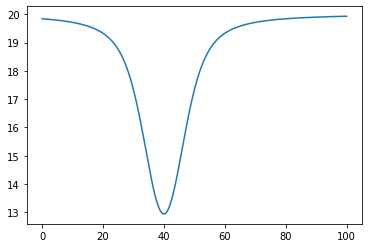

In [6]:
hori=np.linspace(0,100,1000)
verti=generate_parabola(hori,40,20,10,10,10)
plt.plot(hori,verti)

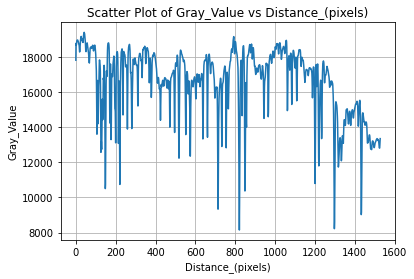

In [7]:
plt.plot(x_values, y_values)
plt.title(f"Scatter Plot of {y_column} vs {x_column}")
plt.xlabel(x_column)
plt.ylabel(y_column)
plt.grid(True)

# Show the plot
plt.show()


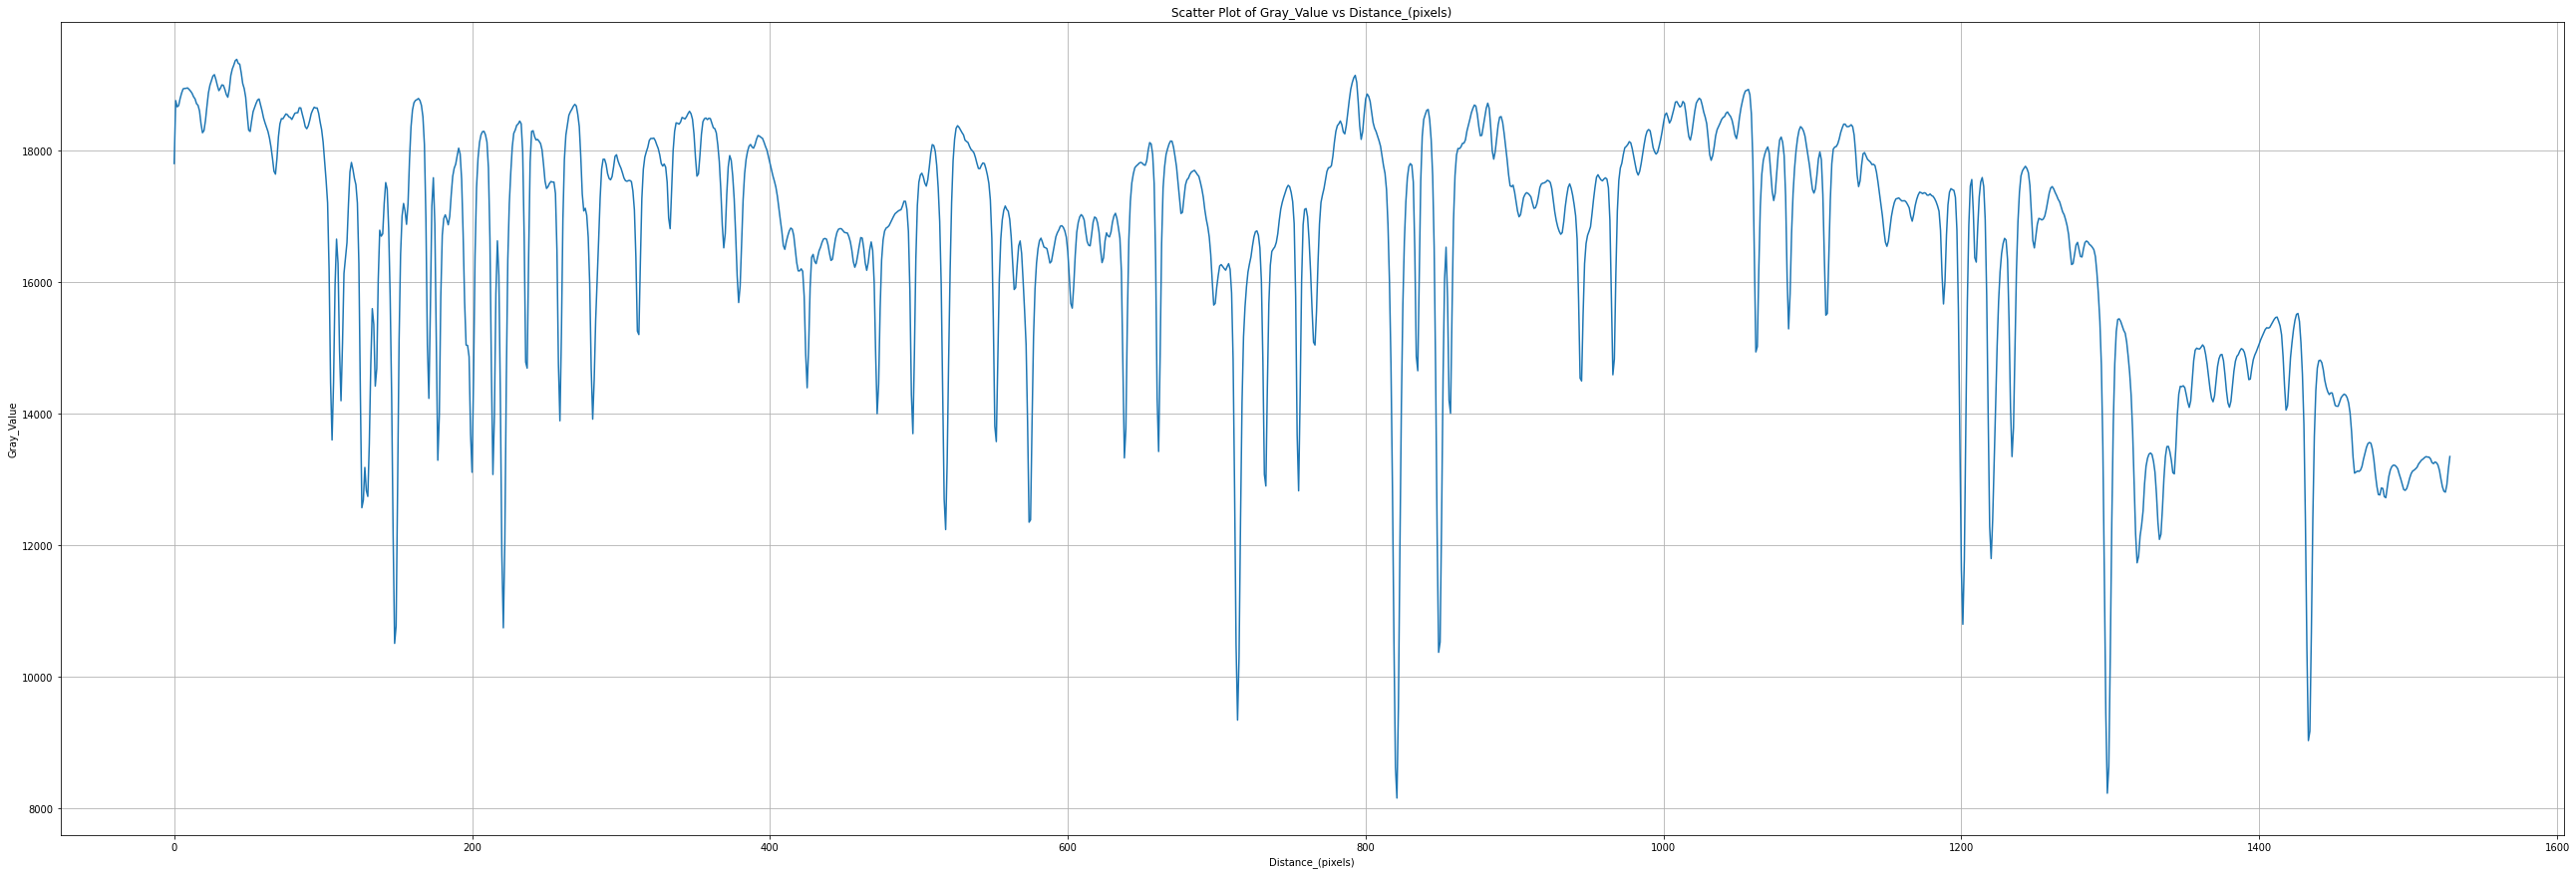

In [8]:
fig,ax = plt.subplots(ncols=1,figsize=(45,15),sharey=True)

plt.plot(x_values, y_values)
plt.title(f"Scatter Plot of {y_column} vs {x_column}")
plt.xlabel(x_column)
plt.ylabel(y_column)
plt.grid(True)

# Show the plot
plt.show()

In [9]:
len(x_values)

1529

Confirmar Escala

In [10]:
D="Gray_Value"
df.head()

,Distance_(pixels),Gray_Value
0,0,17803.834
1,1,18761.166
2,2,18666.000
3,3,18686.000
4,4,18793.834


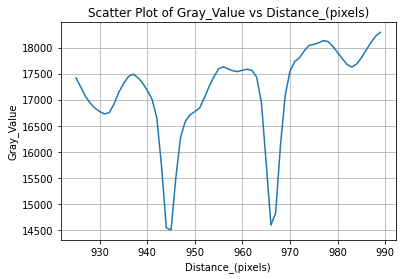

,Distance_(pixels),Gray_Value
945,945.0,14496.167
966,966.0,14590.000


In [11]:
plt.plot(x_values[925:990], y_values[925:990])
plt.title(f"Scatter Plot of {y_column} vs {x_column}")
plt.xlabel(x_column)
plt.ylabel(y_column)
plt.grid(True)
# Show the plot
plt.show()
dfb=df.iloc[925:990]
local_minima = []
for i in range(926, 988):
    if dfb[D][i] < dfb[D][i - 1] and dfb[D][i] < dfb[D][i + 1]:
        if dfb[D][i] <16000:
            local_minima.append(dfb.iloc[i-925])

# Convert the list of local minima to a DataFrame
df3 = pd.DataFrame(local_minima)
df3

In [12]:
PIXELES=[]

# Ajuste Pixeles

In [13]:
def RESIDUALES(X,y,params):
    residuals =  y - generate_parabola(X,*params)
    ss_residual = np.sum(residuals**2)
    ss_total = np.sum((y - np.mean(y))**2)
    r2 = 1 - (ss_residual / ss_total)
    print(r2)
    centro=params[0]
    print(centro)
    horizontal=np.linspace(X[0],X[-1],100)
    plt.plot(horizontal,generate_parabola(horizontal,*params))

0.999567747112652
236.56679539550208


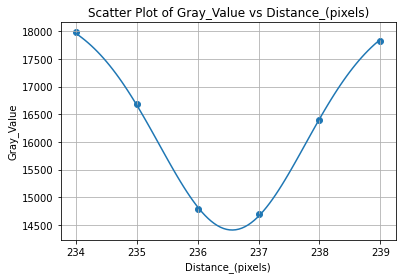

In [14]:
plt.scatter(x_values[234:240], y_values[234:240])
plt.title(f"Scatter Plot of {y_column} vs {x_column}")
plt.xlabel(x_column)
plt.ylabel(y_column)
plt.grid(True)
X= list(df["Distance_(pixels)"])
X=X[234:240]
y=list(y_values)
y=y[234:240]
params, covariance = curve_fit(generate_parabola, X, y,p0=[236.5,18000,3000,1,1])
centro=params[0]
PIXELES.append(centro)
RESIDUALES(X,y,params)


0.9954546848272257
258.84669016502147


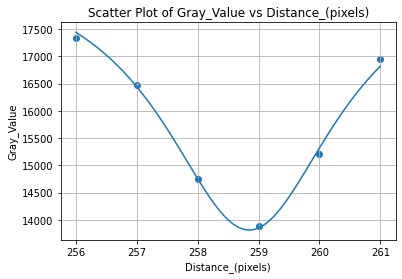

In [15]:
plt.scatter(x_values[256:262], y_values[256:262])
plt.title(f"Scatter Plot of {y_column} vs {x_column}")
plt.xlabel(x_column)
plt.ylabel(y_column)
plt.grid(True)
X= list(df["Distance_(pixels)"])
X=X[256:262]
y=list(y_values)
y=y[256:262]
params, covariance = curve_fit(generate_parabola, X, y,p0=[259,17500,3000,5,1])
centro=params[0]
PIXELES.append(centro)
RESIDUALES(X,y,params)

0.9785494688342092
281.23269218843444


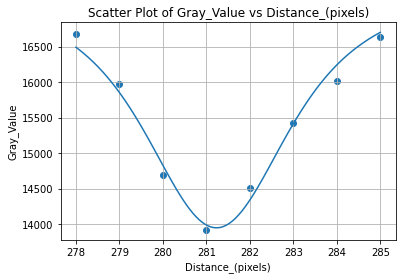

In [16]:
plt.scatter(x_values[278:286], y_values[278:286])
plt.title(f"Scatter Plot of {y_column} vs {x_column}")
plt.xlabel(x_column)
plt.ylabel(y_column)
plt.grid(True)
X= list(df["Distance_(pixels)"])
X=X[278:286]
y=list(y_values)
y=y[278:286]
params, covariance = curve_fit(generate_parabola, X, y,p0=[281,16500,2500,1,1])
centro=params[0]
PIXELES.append(centro)
RESIDUALES(X,y,params)

0.9985828194949425
944.5768811500031


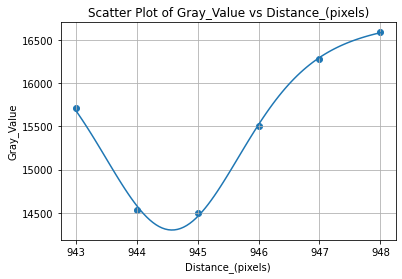

In [17]:
plt.scatter(x_values[943:949], y_values[943:949])
plt.title(f"Scatter Plot of {y_column} vs {x_column}")
plt.xlabel(x_column)
plt.ylabel(y_column)
plt.grid(True)
X= list(df["Distance_(pixels)"])
X=X[943:949]
y=list(y_values)
y=y[943:949]
params, covariance = curve_fit(generate_parabola, X, y,p0=[945,17000,2500,0.1,0.3])
centro=params[0]
PIXELES.append(centro)
RESIDUALES(X,y,params)

0.9997663929434196
966.3742623796586


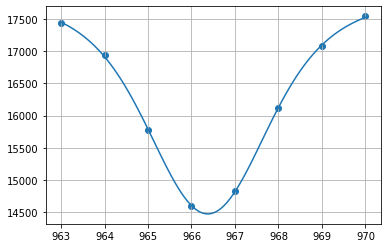

In [18]:
plt.scatter(x_values[963:971], y_values[963:971])
plt.grid(True)
X= list(df["Distance_(pixels)"])
X=X[963:971]
y=list(y_values)
y=y[963:971]
params, covariance = curve_fit(generate_parabola, X, y,p0=[966.5,17000,2500,3,3])
centro=params[0]
PIXELES.append(centro)
RESIDUALES(X,y,params)

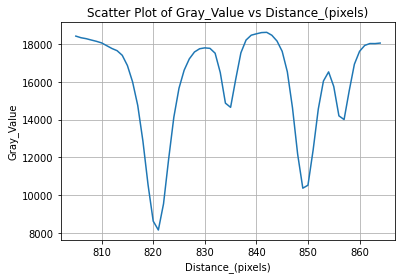

In [19]:
plt.plot(x_values[805:865], y_values[805:865])
plt.title(f"Scatter Plot of {y_column} vs {x_column}")
plt.xlabel(x_column)
plt.ylabel(y_column)
plt.grid(True)
# Show the plot
plt.show()


C:\Users\juang\AppData\Local\Temp/ipykernel_10256/3181688517.py:7: OptimizeWarning: Covariance of the parameters could not be estimated
  params, covariance = curve_fit(generate_parabola, X, y,p0=[834.5,17500,3000,10,10])


1.0
834.6037887922462


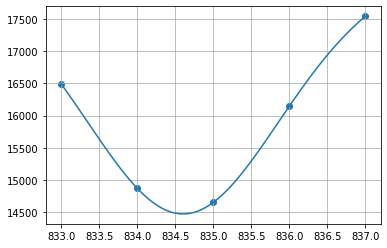

In [20]:
plt.scatter(x_values[833:838], y_values[833:838])
plt.grid(True)
X= list(df["Distance_(pixels)"])
X=X[833:838]
y=list(y_values)
y=y[833:838]
params, covariance = curve_fit(generate_parabola, X, y,p0=[834.5,17500,3000,10,10])
centro=params[0]
PIXELES.append(centro)
RESIDUALES(X,y,params)

0.9962301614231132
856.5840634192017


C:\Users\juang\AppData\Local\Temp/ipykernel_10256/3079424252.py:7: OptimizeWarning: Covariance of the parameters could not be estimated
  params, covariance = curve_fit(generate_parabola, X, y,p0=[857,17000,3000,10,10])


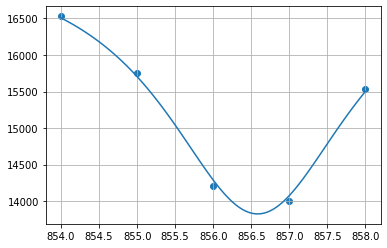

In [21]:
plt.scatter(x_values[854:859], y_values[854:859])
plt.grid(True)
X= list(df["Distance_(pixels)"])
X=X[854:859]
y=list(y_values)
y=y[854:859]
params, covariance = curve_fit(generate_parabola, X, y,p0=[857,17000,3000,10,10])
centro=params[0]
PIXELES.append(centro)
RESIDUALES(X,y,params)

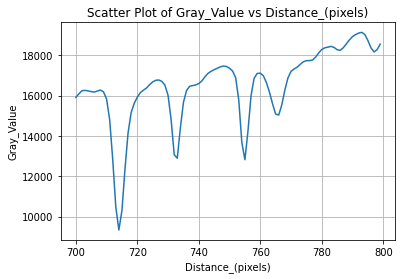

In [22]:
plt.plot(x_values[700:800], y_values[700:800])
plt.title(f"Scatter Plot of {y_column} vs {x_column}")
plt.xlabel(x_column)
plt.ylabel(y_column)
plt.grid(True)
# Show the plot
plt.show()

0.9981623499182154
732.6247262378813


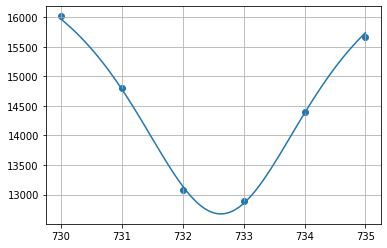

In [23]:
plt.scatter(x_values[730:736], y_values[730:736])
plt.grid(True)
X= list(df["Distance_(pixels)"])
X=X[730:736]
y=list(y_values)
y=y[730:736]
params, covariance = curve_fit(generate_parabola, X, y,p0=[733,15500,2500,10,10])
centro=params[0]
PIXELES.append(centro)
RESIDUALES(X,y,params)

0.998446185704957
754.8845496146274


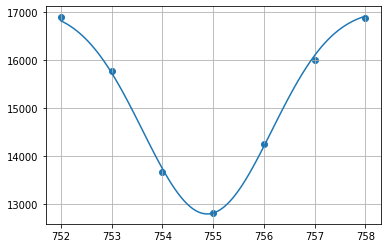

In [24]:
plt.scatter(x_values[752:759], y_values[752:759])
plt.grid(True)
X= list(df["Distance_(pixels)"])
X=X[752:759]
y=list(y_values)
y=y[752:759]
params, covariance = curve_fit(generate_parabola, X, y,p0=[755,16000,5000,5,5])
centro=params[0]
PIXELES.append(centro)
RESIDUALES(X,y,params)

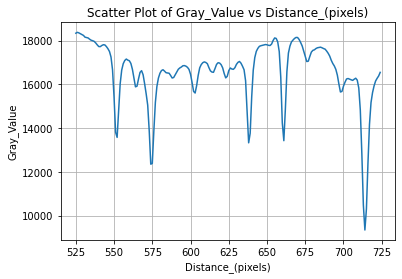

In [25]:
plt.plot(x_values[525:725], y_values[525:725])
plt.title(f"Scatter Plot of {y_column} vs {x_column}")
plt.xlabel(x_column)
plt.ylabel(y_column)
plt.grid(True)
# Show the plot
plt.show()

0.9937353424999674
551.7058583997785


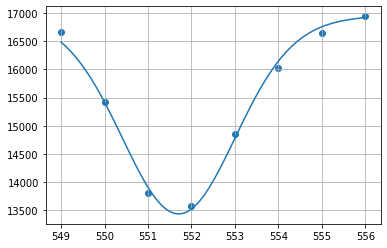

In [26]:
plt.scatter(x_values[549:557], y_values[549:557])
plt.grid(True)
X= list(df["Distance_(pixels)"])
X=X[549:557]
y=list(y_values)
y=y[549:557]
params, covariance = curve_fit(generate_parabola, X, y,p0=[551.5,16500,3000,0.5,1])
centro=params[0]
PIXELES.append(centro)
RESIDUALES(X,y,params)

0.9993919435719016
574.4867021414926


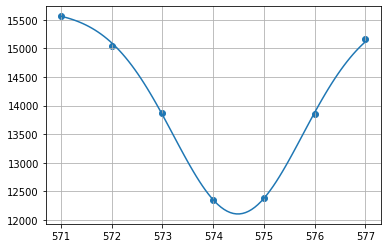

In [27]:
plt.scatter(x_values[571:578], y_values[571:578])
plt.grid(True)
X= list(df["Distance_(pixels)"])
X=X[571:578]
y=list(y_values)
y=y[571:578]
params, covariance = curve_fit(generate_parabola, X, y,p0=[574.5,15000,3000,10,10])
centro=params[0]
PIXELES.append(centro)
RESIDUALES(X,y,params)

0.9996864241575927
638.2894950596391


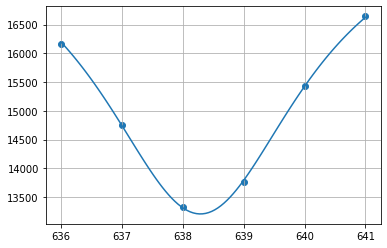

In [28]:
plt.scatter(x_values[636:642], y_values[636:642])
plt.grid(True)
X= list(df["Distance_(pixels)"])
X=X[636:642]
y=list(y_values)
y=y[636:642]
params, covariance = curve_fit(generate_parabola, X, y,p0=[638,16000,2500,0.5,2])
centro=params[0]
PIXELES.append(centro)
RESIDUALES(X,y,params)

0.9984162256699115
660.8704301892491


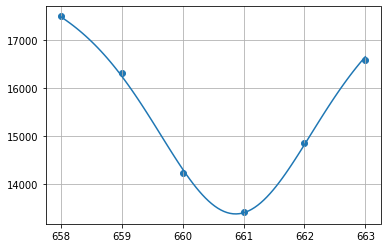

In [29]:
plt.scatter(x_values[658:664], y_values[658:664])
plt.grid(True)
X= list(df["Distance_(pixels)"])
X=X[658:664]
y=list(y_values)
y=y[658:664]
params, covariance = curve_fit(generate_parabola, X, y,p0=[661,17500,4000,10,10])
centro=params[0]
PIXELES.append(centro)
RESIDUALES(X,y,params)

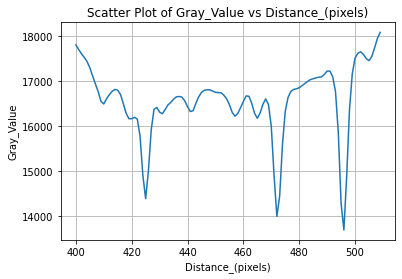

In [30]:
plt.plot(x_values[400:510], y_values[400:510])
plt.title(f"Scatter Plot of {y_column} vs {x_column}")
plt.xlabel(x_column)
plt.ylabel(y_column)
plt.grid(True)
# Show the plot
plt.show()

0.9947149548985935
424.91539091224814


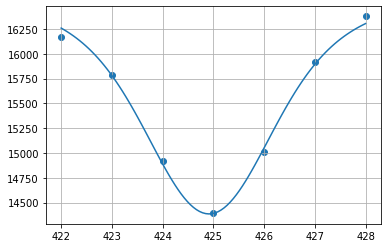

In [31]:
plt.scatter(x_values[422:429], y_values[422:429])
plt.grid(True)
X= list(df["Distance_(pixels)"])
X=X[422:429]
y=list(y_values)
y=y[422:429]
params, covariance = curve_fit(generate_parabola, X, y,p0=[425,17000,2000,5,5])
centro=params[0]
PIXELES.append(centro)
RESIDUALES(X,y,params)

0.9998553933034622
472.2045530780797


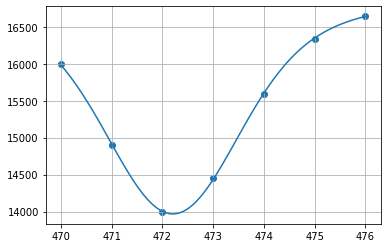

In [32]:
plt.scatter(x_values[470:477], y_values[470:477])
plt.grid(True)
X= list(df["Distance_(pixels)"])
X=X[470:477]
y=list(y_values)
y=y[470:477]
params, covariance = curve_fit(generate_parabola, X, y,p0=[472,16000,2000,10,10])
centro=params[0]
PIXELES.append(centro)
RESIDUALES(X,y,params)

0.9999997085057211
495.80609827168723


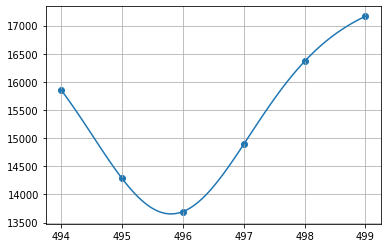

In [33]:
plt.scatter(x_values[494:500], y_values[494:500])
plt.grid(True)
X= list(df["Distance_(pixels)"])
X=X[494:500]
y=list(y_values)
y=y[494:500]
params, covariance = curve_fit(generate_parabola, X, y,p0=[496,16500,3000,10,10])
centro=params[0]
PIXELES.append(centro)
RESIDUALES(X,y,params)

0.9858917988310085
1084.240832273254


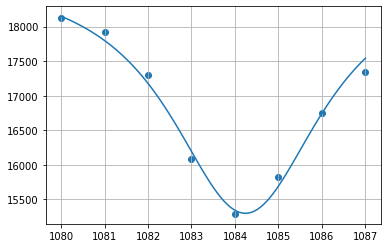

In [34]:
plt.scatter(x_values[1080:1088], y_values[1080:1088])
plt.grid(True)
X= list(df["Distance_(pixels)"])
X=X[1080:1088]
y=list(y_values)
y=y[1080:1088]
params, covariance = curve_fit(generate_parabola, X, y,p0=[1084,18000,3500,5,5])
centro=params[0]
PIXELES.append(centro)
RESIDUALES(X,y,params)

0.9994382072064655
1188.0710510440579


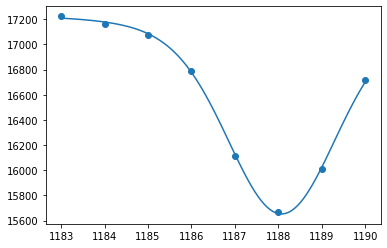

In [35]:
plt.scatter(x_values[1183:1191], y_values[1183:1191])
X= list(df["Distance_(pixels)"])
X=X[1183:1191]
y=list(y_values)
y=y[1183:1191]
params, covariance = curve_fit(generate_parabola, X, y,p0=[1188,17200,1500,5,10])
centro=params[0]
PIXELES.append(centro)
RESIDUALES(X,y,params)

0.9954862814462891
1209.6566596747052


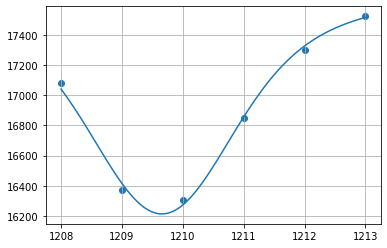

In [36]:
plt.scatter(x_values[1208:1214], y_values[1208:1214])
plt.grid(True)
X= list(df["Distance_(pixels)"])
X=X[1208:1214]
y=list(y_values)
y=y[1208:1214]
params, covariance = curve_fit(generate_parabola, X, y,p0=[1210,17600,1500,10,10])
centro=params[0]
PIXELES.append(centro)
RESIDUALES(X,y,params)

In [37]:
PIXELES.sort()
PIXELES

[236.56679539550208,
 258.84669016502147,
 281.23269218843444,
 424.91539091224814,
 472.2045530780797,
 495.80609827168723,
 551.7058583997785,
 574.4867021414926,
 638.2894950596391,
 660.8704301892491,
 732.6247262378813,
 754.8845496146274,
 834.6037887922462,
 856.5840634192017,
 944.5768811500031,
 966.3742623796586,
 1084.240832273254,
 1188.0710510440579,
 1209.6566596747052]

In [38]:
moore=[6281.178,6281.956,6282.726,6287.749,6289.398,6290.221,6292.162,6292.958,6295.178,6295.96,6298.457,6299.228,6302,6302.764,6305.81,6306.565,6310.636,6314.235,6314.977]
Pix = [238, 260.5, 282.5, 426.6, 473.7, 497, 553, 576, 640, 662, 734, 756, 836, 858, 946, 968, 1085, 1190, 1211]
dif=[]
for i in range(len(PIXELES)):
    d=PIXELES[i]-Pix[i]
    dif.append(d)
Comparacion=  pd.DataFrame({
    'Posición Angstrom': moore,
    'Pixeles Estimados': Pix,
    'Pixeles Calculados': PIXELES,
    "Diferencia": dif
})

In [39]:
Comparacion

,Posición Angstrom,Pixeles Estimados,Pixeles Calculados,Diferencia
0,6281.178,238.0,236.566795,-1.433205
1,6281.956,260.5,258.846690,-1.653310
2,6282.726,282.5,281.232692,-1.267308
3,6287.749,426.6,424.915391,-1.684609
4,6289.398,473.7,472.204553,-1.495447
5,6290.221,497.0,495.806098,-1.193902
6,6292.162,553.0,551.705858,-1.294142
7,6292.958,576.0,574.486702,-1.513298
8,6295.178,640.0,638.289495,-1.710505
9,6295.960,662.0,660.870430,-1.129570


# Escala Pixeles -Angstrom

In [40]:
print(PIXELES)

[236.56679539550208, 258.84669016502147, 281.23269218843444, 424.91539091224814, 472.2045530780797, 495.80609827168723, 551.7058583997785, 574.4867021414926, 638.2894950596391, 660.8704301892491, 732.6247262378813, 754.8845496146274, 834.6037887922462, 856.5840634192017, 944.5768811500031, 966.3742623796586, 1084.240832273254, 1188.0710510440579, 1209.6566596747052]


0.9999998798051216


C:\Users\juang\AppData\Local\Temp/ipykernel_10256/3032615193.py:7: OptimizeWarning: Covariance of the parameters could not be estimated
  params_escala, covariance = curve_fit(escala, x,moore)


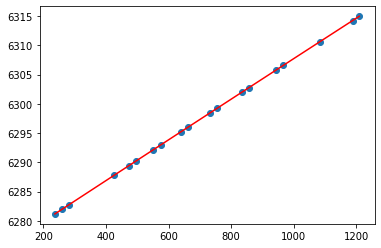

In [41]:
def escala(x, A,a,B,b,C,c,D):
    return (A*(x+a))+(B*((x+b)**2))+D#+(C*((x+c)**3))
x=PIXELES
moore=[6281.178,6281.956,6282.726,6287.749,6289.398,6290.221,6292.162,6292.958,6295.178,6295.96,6298.457,6299.228,6302,6302.764,6305.81,6306.565,6310.636,6314.235,6314.977]
Rowland1=[6287.285,6289.140,6290.221,6292.162,6292.958,6294.650,6295.96,6298.457,6299.228,6302,6302.764,6305.314,6306.565,6310.636]
Rowland2=[6287.945,6289.95,6290.221,6292.614,6292.958,6295.650,6295.96,6298.457,6299.228,6302,6302.764,6305.81,6306.565,6310.636]
params_escala, covariance = curve_fit(escala, x,moore)
plt.scatter(x, moore)
y=[]
for i in range(len(x)):
    Y=escala(x[i],*params_escala)
    y.append(Y)
plt.plot(x, y,"r")
moore=np.array(moore)
y= np.array(y)
residuals =  moore - y
ss_residual = np.sum(residuals**2)
ss_total = np.sum((moore - np.mean(moore))**2)
r2 = 1 - (ss_residual / ss_total)
print(r2)

In [42]:
#APLICACION ESCALA
print(escala(810,*params_escala))

6301.142916649878


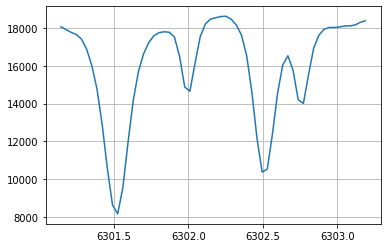

In [43]:
#APLICACION ESCALA
armstrong=[]
for i in range(1529):
    armstrong.append(escala(i,*params_escala))

plt.plot(armstrong[810:870], y_values[810:870])

plt.grid(True)

# Show the plot
plt.show()

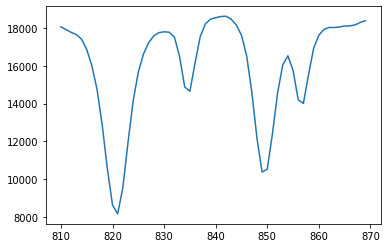

In [44]:
plt.plot(x_values[810:870], y_values[810:870])

# Prueba Ajuste

In [45]:
df["Armstrong"] = armstrong

In [46]:
posiciones=[armstrong,x_values]

In [47]:
Centros=[]

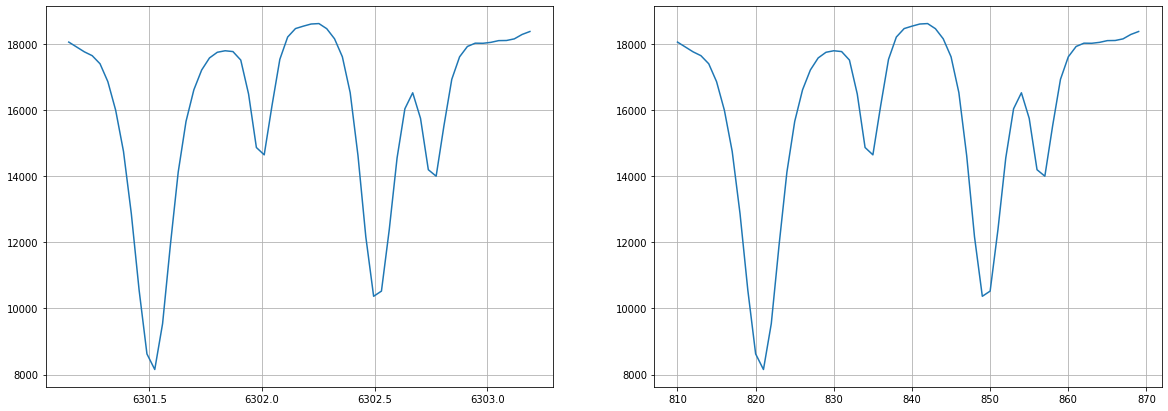

In [48]:
fig,ax = plt.subplots(ncols=2,figsize=(20,7))
for i in range(2):
    plt.sca(ax[i])
    plt.plot(posiciones[i][810:870], y_values[810:870])
    plt.grid(True)
# Show the plot


# Ajuste Curvas Angstrom

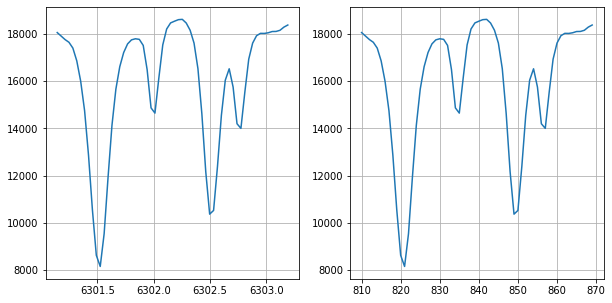

In [49]:
fig,ax = plt.subplots(ncols=2,figsize=(10,5))
for i in range(2):
    plt.sca(ax[i])
    plt.plot(posiciones[i][810:870], y_values[810:870])
    plt.grid(True)
# Show the plot

0.9998003858649243
820.7089828437698


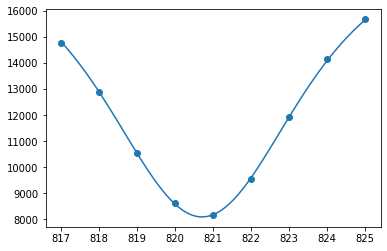

In [50]:
plt.scatter(x_values[817:826], y_values[817:826])
X= list(df["Distance_(pixels)"])
X=X[817:826]
y=list(y_values)
y=y[817:826]
params, covariance = curve_fit(generate_parabola, X, y,p0=[821,15000,7000,10,10])
centro=params[0]
Centros.append(centro)
RESIDUALES(X,y,params)

0.996040926965867
849.504158566992


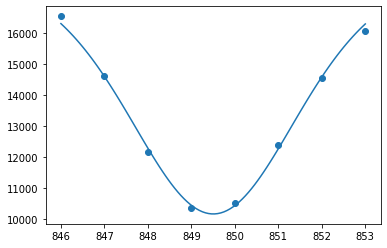

In [51]:
plt.scatter(x_values[846:854], y_values[846:854])
X= list(df["Distance_(pixels)"])
X=X[846:854]
y=list(y_values)
y=y[846:854]
params, covariance = curve_fit(generate_parabola, X, y,p0=[849.5,16000,6000,10,10])
centro=params[0]
Centros.append(centro)
RESIDUALES(X,y,params)

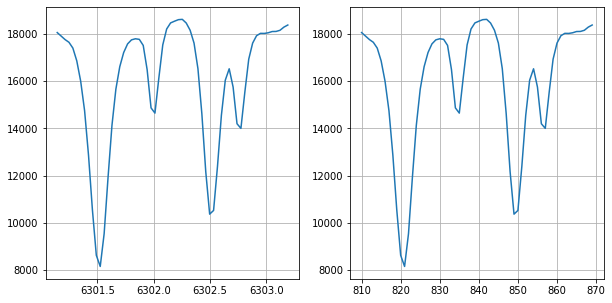

In [52]:
fig,ax = plt.subplots(ncols=2,figsize=(10,5))
for i in range(2):
    plt.sca(ax[i])
    plt.plot(posiciones[i][810:870], y_values[810:870])
    plt.grid(True)
# Show the plot

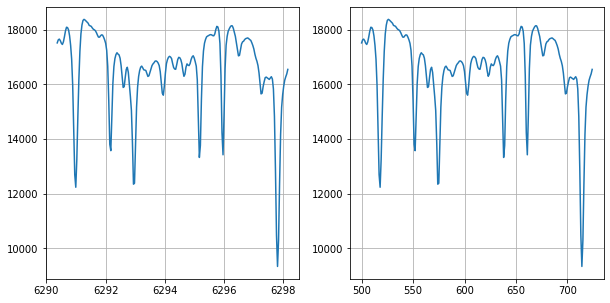

In [53]:
fig,ax = plt.subplots(ncols=2,figsize=(10,5))
for i in range(2):
    plt.sca(ax[i])
    plt.plot(posiciones[i][500:725], y_values[500:725])
    plt.grid(True)
# Show the plot

0.9974692367557401
517.8419301510922


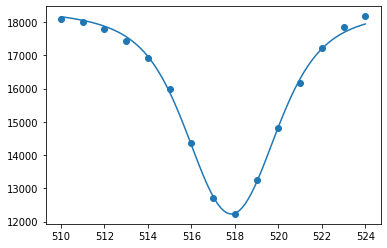

In [54]:
plt.scatter(x_values[510:525], y_values[510:525])
X= list(df["Distance_(pixels)"])
X=X[510:525]
y=list(y_values)
y=y[510:525]
params, covariance = curve_fit(generate_parabola, X, y,p0=[518,18000,6000,10,10])
centro=params[0]
Centros.append(centro)
RESIDUALES(X,y,params)

0.9979003179482928
714.1085645592836


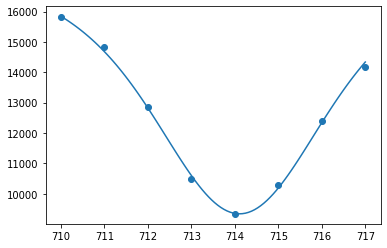

In [55]:
plt.scatter(x_values[710:718], y_values[710:718])
X= list(df["Distance_(pixels)"])
X=X[710:718]
y=list(y_values)
y=y[710:718]
params, covariance = curve_fit(generate_parabola, X, y,p0=[714,16000,6000,10,10])
centro=params[0]
Centros.append(centro)
RESIDUALES(X,y,params)

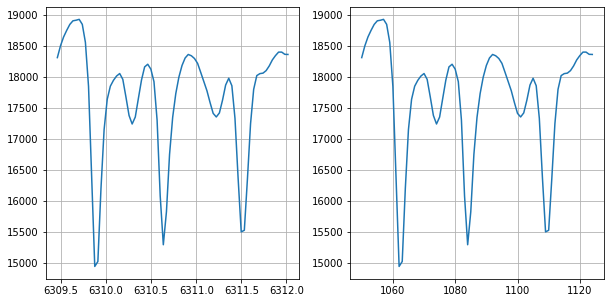

In [56]:
fig,ax = plt.subplots(ncols=2,figsize=(10,5))
for i in range(2):
    plt.sca(ax[i])
    plt.plot(posiciones[i][1050:1125], y_values[1050:1125])
    plt.grid(True)
# Show the plot

0.9951859426199285
1062.5391025518666


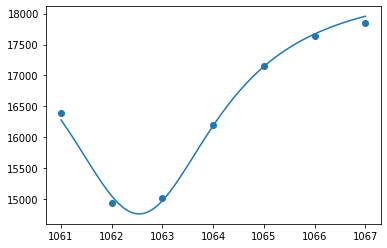

In [57]:
plt.scatter(x_values[1061:1068], y_values[1061:1068])
X= list(df["Distance_(pixels)"])
X=X[1061:1068]
y=list(y_values)
y=y[1061:1068]
params, covariance = curve_fit(generate_parabola, X, y,p0=[1062,18000,3000,10,10])
centro=params[0]
Centros.append(centro)
RESIDUALES(X,y,params)

0.9994168975371064
1109.5181306402494


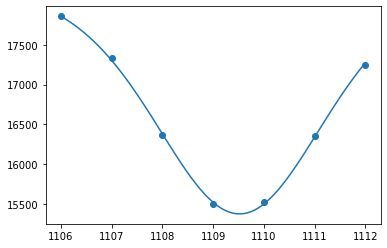

In [58]:
plt.scatter(x_values[1106:1113], y_values[1106:1113])
X= list(df["Distance_(pixels)"])
X=X[1106:1113]
y=list(y_values)
y=y[1106:1113]
params, covariance = curve_fit(generate_parabola, X, y,p0=[1109,18000,2500,10,10])
centro=params[0]
Centros.append(centro)
RESIDUALES(X,y,params)

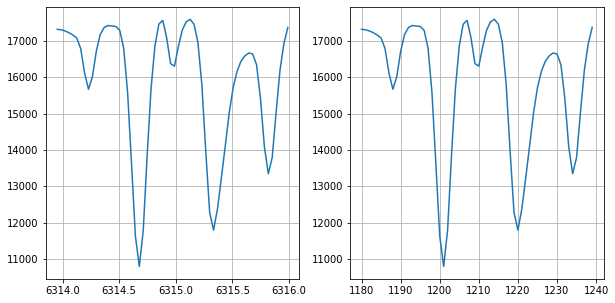

In [59]:
fig,ax = plt.subplots(ncols=2,figsize=(10,5))
for i in range(2):
    plt.sca(ax[i])
    plt.plot(posiciones[i][1180:1240], y_values[1180:1240])
    plt.grid(True)
# Show the plot

0.968867874385809
1200.9532317842934


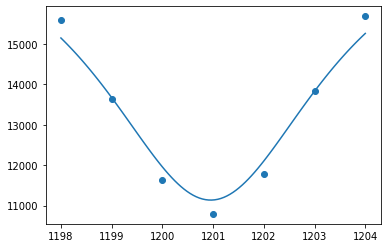

In [60]:
plt.scatter(x_values[1198:1205], y_values[1198:1205])
X= list(df["Distance_(pixels)"])
X=X[1198:1205]
y=list(y_values)
y=y[1198:1205]
params, covariance = curve_fit(generate_parabola, X, y,p0=[1201,18000,7400,10,1.3])
centro=params[0]
Centros.append(centro)
RESIDUALES(X,y,params)

0.9988568518762201
1219.960949987665


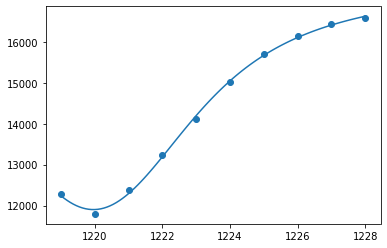

In [61]:
plt.scatter(x_values[1219:1229], y_values[1219:1229])
X= list(df["Distance_(pixels)"])
X=X[1219:1229]
y=list(y_values)
y=y[1219:1229]
params, covariance = curve_fit(generate_parabola, X, y,p0=[1220,16500,4500,10,10])
centro=params[0]
Centros.append(centro)
RESIDUALES(X,y,params)

0.9958997360858691
1234.1361603597309


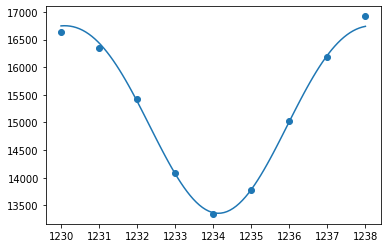

In [62]:
plt.scatter(x_values[1230:1239], y_values[1230:1239])
X= list(df["Distance_(pixels)"])
X=X[1230:1239]
y=list(y_values)
y=y[1230:1239]
params, covariance = curve_fit(generate_parabola, X, y,p0=[1234,16500,3000,10,10])
centro=params[0]
Centros.append(centro)
RESIDUALES(X,y,params)

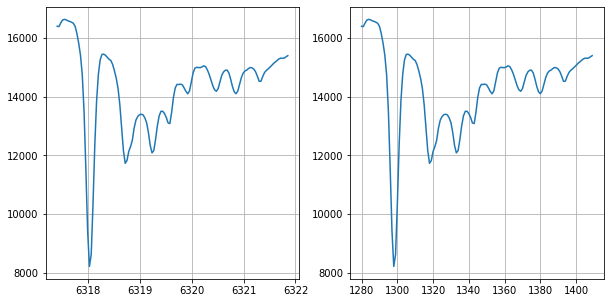

In [63]:
fig,ax = plt.subplots(ncols=2,figsize=(10,5))
for i in range(2):
    plt.sca(ax[i])
    plt.plot(posiciones[i][1280:1410], y_values[1280:1410])
    plt.grid(True)
# Show the plot

0.9990965348516591
1298.3042952250378


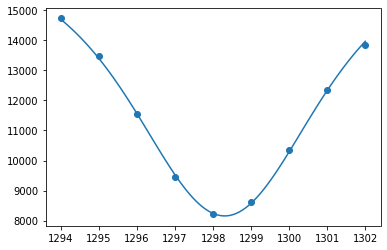

In [64]:
plt.scatter(x_values[1294:1303], y_values[1294:1303])
X= list(df["Distance_(pixels)"])
X=X[1294:1303]
y=list(y_values)
y=y[1294:1303]
params, covariance = curve_fit(generate_parabola, X, y,p0=[1298,15000,7000,10,10])
centro=params[0]
Centros.append(centro)
RESIDUALES(X,y,params)

0.982392405284792
1318.6428418169767


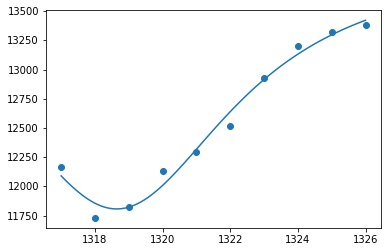

In [65]:
plt.scatter(x_values[1317:1327], y_values[1317:1327])
X= list(df["Distance_(pixels)"])
X=X[1317:1327]
y=list(y_values)
y=y[1317:1327]
params, covariance = curve_fit(generate_parabola, X, y,p0=[1318,13300,2000,10,10])
centro=params[0]
Centros.append(centro)
RESIDUALES(X,y,params)

0.9895530217881926
1333.263063465515


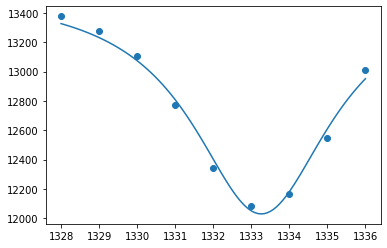

In [66]:
plt.scatter(x_values[1328:1337], y_values[1328:1337])
X= list(df["Distance_(pixels)"])
X=X[1328:1337]
y=list(y_values)
y=y[1328:1337]
params, covariance = curve_fit(generate_parabola, X, y,p0=[1333,13300,1300,10,10])
centro=params[0]
Centros.append(centro)
RESIDUALES(X,y,params)

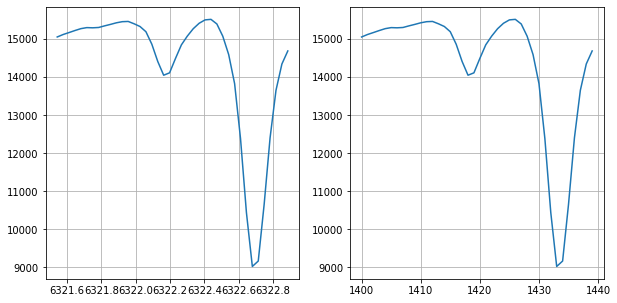

In [67]:
fig,ax = plt.subplots(ncols=2,figsize=(10,5))
for i in range(2):
    plt.sca(ax[i])
    plt.plot(posiciones[i][1400:1440], y_values[1400:1440])
    plt.grid(True)
# Show the plot

0.9970908405657225
1418.442524145423


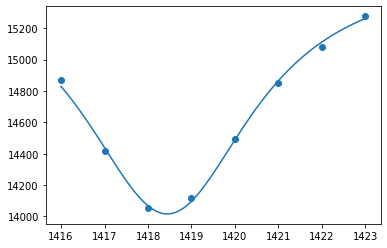

In [68]:
plt.scatter(x_values[1416:1424], y_values[1416:1424])
X= list(df["Distance_(pixels)"])
X=X[1416:1424]
y=list(y_values)
y=y[1416:1424]
params, covariance = curve_fit(generate_parabola, X, y,p0=[1419,15200,1200,10,10])
centro=params[0]
Centros.append(centro)
RESIDUALES(X,y,params)

0.9995189160460068
1433.4600288130289


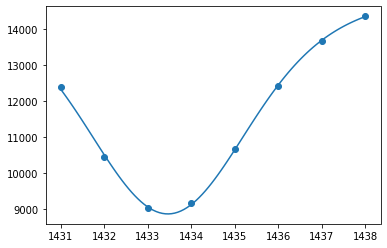

In [69]:
plt.scatter(x_values[1431:1439], y_values[1431:1439])
X= list(df["Distance_(pixels)"])
X=X[1431:1439]
y=list(y_values)
y=y[1431:1439]
params, covariance = curve_fit(generate_parabola, X, y,p0=[1433,14000,5000,10,10])
centro=params[0]
Centros.append(centro)
RESIDUALES(X,y,params)

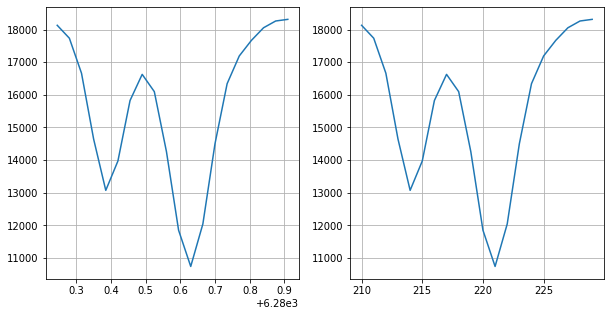

In [70]:
fig,ax = plt.subplots(ncols=2,figsize=(10,5))
for i in range(2):
    plt.sca(ax[i])
    plt.plot(posiciones[i][210:230], y_values[210:230])
    plt.grid(True)
# Show the plot

0.9997836688676214
220.94522610384809


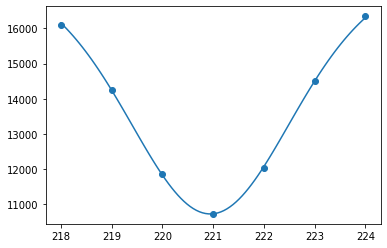

In [71]:
plt.scatter(x_values[218:225], y_values[218:225])
X= list(df["Distance_(pixels)"])
X=X[218:225]
y=list(y_values)
y=y[218:225]
params, covariance = curve_fit(generate_parabola, X, y,p0=[221,16000,5000,10,10])
centro=params[0]
Centros.append(centro)
RESIDUALES(X,y,params)

# Calculo Velocidades

In [72]:
Lineas_abs_angstrom=[]
for i in range(len(Centros)):
    a=escala(Centros[i],*params_escala)
    Lineas_abs_angstrom.append(a)

In [73]:
Lineas_abs_angstrom.sort()
print(Lineas_abs_angstrom)


[6280.6280186220065, 6290.986475200414, 6297.813405492674, 6301.514507092743, 6302.513426904778, 6309.892738405761, 6311.517439558007, 6314.676891096005, 6315.333236893945, 6315.822613558212, 6318.036844969214, 6318.738294948649, 6319.242418389549, 6322.177699961769, 6322.694881925763]


In [74]:
# Separación de otro elementos del Hierro
indices_to_remove = [6-1, 8-1, 13-1, 14-1,12-1]
Hierros = [Lineas_abs_angstrom[i] for i in range(len(Lineas_abs_angstrom)) if i not in indices_to_remove]
print(Hierros)

[6280.6280186220065, 6290.986475200414, 6297.813405492674, 6301.514507092743, 6302.513426904778, 6311.517439558007, 6315.333236893945, 6315.822613558212, 6318.036844969214, 6322.694881925763]


In [75]:
#Reales_Air_Hierro=[6280.6178,6290.9658,6297.7927,6301.5008,6302.4932,6311.4999,6315.3063,6315.8110,6318.0171,6322.6851]
#Reales_Ritz_Hierro=[6280.6167,6290.9648,6297.7923,6301.4996,6302.4932,6311.4991,6315.3056,6315.8107,6318.0176,6322.6847]

#La linea 6315.348947813029 resulta en una velocidad atipica respecto al resto de velocidades, se presenta la opción de realizar los calculos estadisticos ignorando este valor atipico con fines comparativos: 

Reales_Air_Hierro=[6280.6178,6290.9658,6297.7927,6301.5008,6302.4932,6311.4999,6315.8110,6318.0171,6322.6851]
Reales_Ritz_Hierro=[6280.6167,6290.9648,6297.7923,6301.4996,6302.4932,6311.4991,6315.8107,6318.0176,6322.6847]
Hierros.pop(6)

6315.333236893945

Datos tomados del: NIST Atomic Spectra Database Lines Data

In [76]:
from scipy.constants import c
def vel_tan(real, doppler):
    #v= ((real/doppler)-1)*c
    v=((doppler-real)/real)*c
    return v
def tiempo(vt):
    vt_km= vt/1000 #metros a kilometros
    ra_sol= 1391016/2
    tiempo_s= (2*np.pi*ra_sol)/np.abs(vt_km)
    tiempo_d= tiempo_s/ (60*60*24)   #segundos a dias
    return tiempo_d


In [77]:
velocidades_Air=[]
velocidades_Ritz=[]

In [78]:
#Fe1
for i in range(len(Hierros)):
    vt1=vel_tan(Reales_Air_Hierro[i], Hierros[i])
    vt2=vel_tan(Reales_Ritz_Hierro[i], Hierros[i])
    velocidades_Air.append(vt1)
    velocidades_Ritz.append(vt2)
    print(vt1)
    print(vt2)
    print("--------------------")


487.76504258912786
540.2713896908803
--------------------
985.2651164964758
1032.9197216098587
--------------------
985.6390704743923
1004.6802474000789
--------------------
652.1117993790193
709.2016597106543
--------------------
962.1388407113043
962.1388407113043
--------------------
833.1184806357649
871.1181109984756
--------------------
551.2605051854612
565.5006252522976
--------------------
936.9067478203324
913.1814740123089
--------------------
463.81363648974053
482.7798153180716
--------------------


Calculo Estadistico para Lineas de Hierro

In [79]:
promedio_hierro_air=sum(velocidades_Air)/len(velocidades_Air)
promedio_hierro_Ritz=sum(velocidades_Ritz)/len(velocidades_Ritz)
std_hierro_air=np.std(velocidades_Air)
std_hierro_ritz=np.std(velocidades_Ritz)
print("Promedio Air: "+str(promedio_hierro_air)+" .Desviación Estandar: "+str(std_hierro_air))
print("Promedio Ritz: "+str(promedio_hierro_Ritz)+" .Desviación Estandar: "+str(std_hierro_ritz))
print("Promedio General: "+str((promedio_hierro_Ritz+promedio_hierro_air)/2))

Promedio Air: 762.0021377535134 .Desviación Estandar: 209.8078435373172
Promedio Ritz: 786.8657649671034 .Desviación Estandar: 202.7784106959504
Promedio General: 774.4339513603084


(array([3., 0., 1., 2., 3.]),
 array([ 482.77981532,  592.80779658,  702.83577783,  812.86375909,
         922.89174035, 1032.91972161]),
 <BarContainer object of 5 artists>)

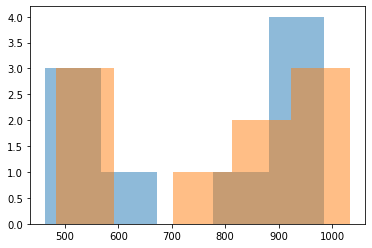

In [84]:
plt.hist(velocidades_Air,bins=5,alpha=0.5)
plt.hist(velocidades_Ritz,bins=5,alpha=0.5)

Calculo Estadistico para lineas de otros elementos

In [81]:
#Sc
Real_Air=6309.88
Doppler=Lineas_abs_angstrom[5]
vt1=vel_tan(Real_Air, Doppler)
velocidades_Air.append(vt1)
print(vt1)

605.2219652262888


In [82]:
#Ni
Real_Air=6314.66
Real_Ritz=6314.659
Doppler=Lineas_abs_angstrom[7]
vt1=vel_tan(Real_Air, Doppler)
vt2=vel_tan(Real_Ritz, Doppler)
velocidades_Air.append(vt1)
velocidades_Ritz.append(vt2)
print(vt1)
print(vt2)

801.9154142618065
849.3911781908628


In [83]:
#Mg
Real_Air=6319.236
Real_Ritz=6319.237
Doppler=Lineas_abs_angstrom[12]
vt1=vel_tan(Real_Air, Doppler)
vt2=vel_tan(Real_Ritz, Doppler)
velocidades_Air.append(vt1)
velocidades_Ritz.append(vt2)
print(vt1)
print(vt2)

304.49642636739145
257.0551351865887


In [84]:
#Ni
Real_Ritz=6322.166 	
Doppler=Lineas_abs_angstrom[13]
vt2=vel_tan(Real_Ritz, Doppler)
velocidades_Ritz.append(vt2)
print(vt2)

554.8035747692377


In [85]:
len(velocidades_Air)

12

In [86]:
promedio_otros_air=sum(velocidades_Air[10:])/len(velocidades_Air[10:])
promedio_otros_Ritz=sum(velocidades_Ritz[10:])/len(velocidades_Ritz[10:])
std_otros_air=np.std(velocidades_Air[10:])
std_otros_ritz=np.std(velocidades_Ritz[10:])
print("Promedio Air: "+str(promedio_otros_air)+" .Desviación Estandar: "+str(std_otros_air))
print("Promedio Ritz: "+str(promedio_otros_Ritz)+" .Desviación Estandar: "+str(std_otros_ritz))
print("Promedio General: "+str((promedio_otros_Ritz+promedio_otros_air)/2))

Promedio Air: 553.205920314599 .Desviación Estandar: 248.70949394720753
Promedio Ritz: 405.9293549779132 .Desviación Estandar: 148.8742197913245
Promedio General: 479.5676376462561


# Calculos Estadisticos Generales

In [87]:
#Promedio
promedio_Air=sum(velocidades_Air)/len(velocidades_Air)
promedio_Ritz=sum(velocidades_Ritz)/len(velocidades_Ritz)
print(promedio_Air)
print(promedio_Ritz)

714.1377538030923
728.5868144042183


In [88]:
promedio_ge=(sum(velocidades_Air)+sum(velocidades_Ritz))/(len(velocidades_Ritz)+len(velocidades_Air))
promedio_ge

721.3622841036553

In [89]:
#Desviación Estandar
std_air=np.std(velocidades_Air)
std_ritz=np.std(velocidades_Ritz)
print(std_air)
print(std_ritz)

224.3818467788763
235.89830303570494


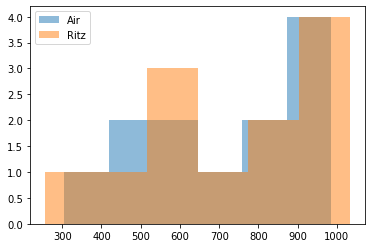

In [91]:
plt.hist(velocidades_Air,bins=6,label="Air",alpha=0.5)
plt.hist(velocidades_Ritz,bins=6,label="Ritz",alpha=0.5)
plt.legend()